# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|██████████| 60.0k/60.0k [00:31<00:00, 1.91kFile/s]


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

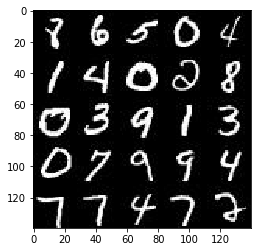

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

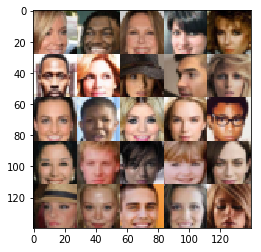

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.12.0


/Users/michel.fernandes/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [33]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    real_inputs = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), "input_real")
    z_inputs = tf.placeholder(tf.float32, (None, z_dim), "input_z")
    learning_rate = tf.placeholder(tf.float32, name="lr")

    return real_inputs, z_inputs, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [34]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    alpha = 0.1
    keep_prob = 0.9

    with tf.variable_scope('discriminator', reuse=reuse):
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', activation=None)
        x1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d(x1, 128, 5, strides=2, padding='same', activation=None)
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.nn.dropout(x2, keep_prob=keep_prob)
        
        x3 = tf.layers.conv2d(x2, 256, 5, strides=2, padding='same', activation=None)
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.nn.dropout(x3, keep_prob=keep_prob)
        
        flat = tf.reshape(x3, (-1,  4 * 4 * 256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/Users/michel.fernandes/anaconda/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "/Users/michel.fernandes/anaconda/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "/Users/michel.fernandes/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()  File "/Users/michel.fernandes/anaconda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()  File "/Users/michel.fernandes/anaconda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()  File "/Users/michel.fernandes/anaco

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [35]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    alpha = 0.1
    keep_prob = 0.9
    
    with tf.variable_scope('generator', reuse=not is_train):
        g1 = tf.layers.dense(z, 7*7*512)
        g1 = tf.reshape(g1, (-1, 7, 7, 512))
        g1 = tf.layers.batch_normalization(g1, training=is_train)
        g1 = tf.maximum(alpha * g1, g1)
        # shape = 7x7x512
        
        g2 = tf.layers.conv2d_transpose(g1, 256, 5, strides=2, padding='same', activation=None)
        g2 = tf.layers.batch_normalization(g2, training=is_train)
        g2 = tf.maximum(alpha * g2, g2)
        g2 = tf.nn.dropout(g2, keep_prob=keep_prob)
        # shape = 14x14x256
        
        g3 = tf.layers.conv2d_transpose(g2, 128, 5, strides=2, padding='same', activation=None)
        g3 = tf.layers.batch_normalization(g3, training=is_train)
        g3 = tf.maximum(alpha * g3, g3)   
        g3 = tf.nn.dropout(g3, keep_prob=keep_prob)
        # shape = 28x28x128
        
        logits = tf.layers.conv2d_transpose(g3, out_channel_dim, 3, strides=1, padding='same', activation=None)
        # shape = 28x28x5
        
        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [36]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    smooth = 0.1
    g_output = generator(input_z, out_channel_dim)
    disc_output_real, disc_logits_real = discriminator(input_real)
    disc_output_fake, disc_logits_fake = discriminator(g_output, reuse=True)
    
    disc_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits = disc_logits_real,
            labels = tf.ones_like(disc_output_real) * (1 - smooth)
        )
    )
    disc_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits = disc_logits_fake,
            labels = tf.zeros_like(disc_output_fake)
        )
    )
    gen_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits = disc_logits_fake,
            labels = tf.ones_like(disc_output_fake)
        )
    )
    
    disc_loss = disc_loss_real + disc_loss_fake
    return disc_loss, gen_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [37]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    train_vars = tf.trainable_variables()
    disc_vars = [var for var in train_vars if var.name.startswith('discriminator')]
    gen_vars = [var for var in train_vars if var.name.startswith('generator')]
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

    with tf.control_dependencies(update_ops):
        gen_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=gen_vars)
        disc_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=disc_vars)

        return disc_train_opt, gen_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [39]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [40]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    _, image_width, image_height, image_channels = data_shape
    input_real, input_z, lr = model_inputs(image_width, image_height, image_channels, z_dim)
    disc_loss, gen_loss = model_loss(input_real, input_z, image_channels)
    disc_opt, gen_opt = model_opt(disc_loss, gen_loss, lr, beta1)

    
    saver = tf.train.Saver()
    losses = []
    steps = 0
    total_steps = epoch_count * batch_size

    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(
                    disc_opt, 
                    feed_dict={
                        input_real: batch_images, input_z: batch_z, lr: learning_rate 
                    }
                )
                _ = sess.run(
                    gen_opt, 
                    feed_dict={
                        input_real: batch_images, 
                        input_z: batch_z, 
                        lr:learning_rate
                    }
                )
                if steps == 1:
                    print('initial output:')
                    show_generator_output(sess, 16, input_z, image_channels, data_image_mode)
                    
                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = disc_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = gen_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                            "Generator Loss: {:.4f}".format(train_loss_g),
                            "Discriminator Loss: {:.4f}...".format(train_loss_d))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 16, input_z, image_channels, data_image_mode)
                    

        saver.save(sess, './generator.ckpt')

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

initial output:


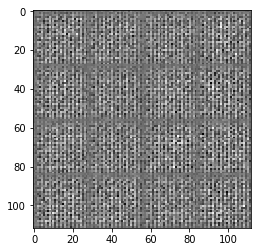

Epoch 1/2... Generator Loss: 4.1275 Discriminator Loss: 0.3714...
Epoch 1/2... Generator Loss: 3.9907 Discriminator Loss: 0.4011...
Epoch 1/2... Generator Loss: 5.1221 Discriminator Loss: 0.3489...
Epoch 1/2... Generator Loss: 2.5573 Discriminator Loss: 0.4510...
Epoch 1/2... Generator Loss: 4.1758 Discriminator Loss: 0.5847...
Epoch 1/2... Generator Loss: 6.0945 Discriminator Loss: 0.4037...
Epoch 1/2... Generator Loss: 0.8414 Discriminator Loss: 1.6325...
Epoch 1/2... Generator Loss: 0.9161 Discriminator Loss: 1.1589...
Epoch 1/2... Generator Loss: 1.1572 Discriminator Loss: 0.9506...
Epoch 1/2... Generator Loss: 1.1049 Discriminator Loss: 1.0730...


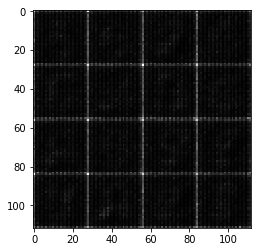

Epoch 1/2... Generator Loss: 0.7979 Discriminator Loss: 1.2972...
Epoch 1/2... Generator Loss: 0.9593 Discriminator Loss: 1.0828...
Epoch 1/2... Generator Loss: 1.3228 Discriminator Loss: 1.0884...
Epoch 1/2... Generator Loss: 1.4680 Discriminator Loss: 1.0872...
Epoch 1/2... Generator Loss: 1.9125 Discriminator Loss: 1.2572...
Epoch 1/2... Generator Loss: 0.9147 Discriminator Loss: 1.0925...
Epoch 1/2... Generator Loss: 0.9837 Discriminator Loss: 1.0849...
Epoch 1/2... Generator Loss: 0.6809 Discriminator Loss: 1.2386...
Epoch 1/2... Generator Loss: 1.5874 Discriminator Loss: 0.9348...
Epoch 1/2... Generator Loss: 2.2359 Discriminator Loss: 1.1204...


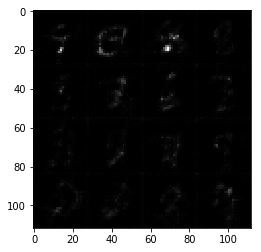

Epoch 1/2... Generator Loss: 0.8580 Discriminator Loss: 1.1048...
Epoch 1/2... Generator Loss: 1.6873 Discriminator Loss: 0.9949...
Epoch 1/2... Generator Loss: 1.6116 Discriminator Loss: 0.9210...
Epoch 1/2... Generator Loss: 1.4622 Discriminator Loss: 0.8782...
Epoch 1/2... Generator Loss: 1.2477 Discriminator Loss: 0.9427...
Epoch 1/2... Generator Loss: 1.7472 Discriminator Loss: 0.9989...
Epoch 1/2... Generator Loss: 1.4019 Discriminator Loss: 0.8941...
Epoch 1/2... Generator Loss: 1.3342 Discriminator Loss: 0.9126...
Epoch 1/2... Generator Loss: 1.2791 Discriminator Loss: 0.9216...
Epoch 1/2... Generator Loss: 1.9658 Discriminator Loss: 1.1803...


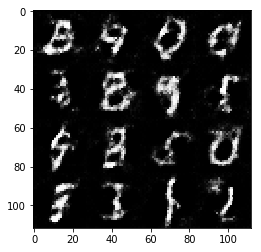

Epoch 1/2... Generator Loss: 1.4076 Discriminator Loss: 0.9534...
Epoch 1/2... Generator Loss: 2.3169 Discriminator Loss: 1.3621...
Epoch 1/2... Generator Loss: 0.8533 Discriminator Loss: 1.1086...
Epoch 1/2... Generator Loss: 2.2168 Discriminator Loss: 1.2500...
Epoch 1/2... Generator Loss: 0.9830 Discriminator Loss: 1.1300...
Epoch 1/2... Generator Loss: 0.7685 Discriminator Loss: 1.1454...
Epoch 1/2... Generator Loss: 1.4863 Discriminator Loss: 1.1312...
Epoch 1/2... Generator Loss: 1.3240 Discriminator Loss: 1.0677...
Epoch 1/2... Generator Loss: 1.1896 Discriminator Loss: 1.1037...
Epoch 1/2... Generator Loss: 0.6358 Discriminator Loss: 1.2302...


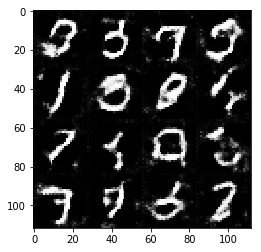

Epoch 1/2... Generator Loss: 1.0795 Discriminator Loss: 1.1311...
Epoch 1/2... Generator Loss: 1.6134 Discriminator Loss: 1.1286...
Epoch 1/2... Generator Loss: 0.7114 Discriminator Loss: 1.2713...
Epoch 1/2... Generator Loss: 0.9511 Discriminator Loss: 1.1848...
Epoch 1/2... Generator Loss: 0.9789 Discriminator Loss: 1.1365...
Epoch 1/2... Generator Loss: 0.6109 Discriminator Loss: 1.3385...
Epoch 2/2... Generator Loss: 1.5055 Discriminator Loss: 1.1206...
Epoch 2/2... Generator Loss: 1.0528 Discriminator Loss: 1.0043...
Epoch 2/2... Generator Loss: 0.7403 Discriminator Loss: 1.2173...
Epoch 2/2... Generator Loss: 0.9950 Discriminator Loss: 1.1123...


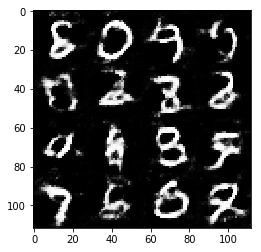

Epoch 2/2... Generator Loss: 0.4865 Discriminator Loss: 1.5650...
Epoch 2/2... Generator Loss: 1.0952 Discriminator Loss: 1.0456...
Epoch 2/2... Generator Loss: 0.8805 Discriminator Loss: 1.1718...
Epoch 2/2... Generator Loss: 0.5987 Discriminator Loss: 1.4251...
Epoch 2/2... Generator Loss: 1.5780 Discriminator Loss: 1.0995...
Epoch 2/2... Generator Loss: 1.4935 Discriminator Loss: 1.1239...
Epoch 2/2... Generator Loss: 1.6449 Discriminator Loss: 1.1905...
Epoch 2/2... Generator Loss: 1.3536 Discriminator Loss: 1.0592...
Epoch 2/2... Generator Loss: 1.2469 Discriminator Loss: 1.0436...
Epoch 2/2... Generator Loss: 0.8685 Discriminator Loss: 1.1384...


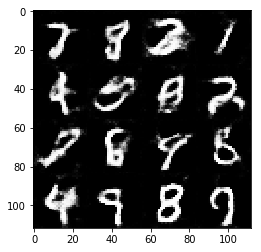

Epoch 2/2... Generator Loss: 1.5568 Discriminator Loss: 1.1061...
Epoch 2/2... Generator Loss: 0.8205 Discriminator Loss: 1.1121...
Epoch 2/2... Generator Loss: 1.2067 Discriminator Loss: 1.0527...
Epoch 2/2... Generator Loss: 1.2913 Discriminator Loss: 1.0459...
Epoch 2/2... Generator Loss: 0.6955 Discriminator Loss: 1.2460...
Epoch 2/2... Generator Loss: 0.4890 Discriminator Loss: 1.4554...
Epoch 2/2... Generator Loss: 1.0553 Discriminator Loss: 0.9889...
Epoch 2/2... Generator Loss: 1.3591 Discriminator Loss: 0.9609...
Epoch 2/2... Generator Loss: 1.0926 Discriminator Loss: 1.0520...
Epoch 2/2... Generator Loss: 0.7302 Discriminator Loss: 1.1801...


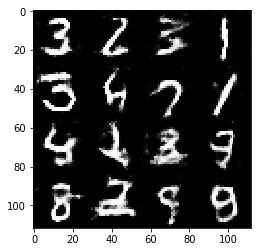

Epoch 2/2... Generator Loss: 1.3036 Discriminator Loss: 1.1112...
Epoch 2/2... Generator Loss: 1.1149 Discriminator Loss: 1.0288...
Epoch 2/2... Generator Loss: 0.6209 Discriminator Loss: 1.2938...
Epoch 2/2... Generator Loss: 1.4334 Discriminator Loss: 1.1399...
Epoch 2/2... Generator Loss: 1.4059 Discriminator Loss: 1.0661...
Epoch 2/2... Generator Loss: 1.1650 Discriminator Loss: 1.0163...
Epoch 2/2... Generator Loss: 0.8439 Discriminator Loss: 1.2166...
Epoch 2/2... Generator Loss: 1.8698 Discriminator Loss: 1.1196...
Epoch 2/2... Generator Loss: 0.9041 Discriminator Loss: 1.0829...
Epoch 2/2... Generator Loss: 1.5252 Discriminator Loss: 1.1288...


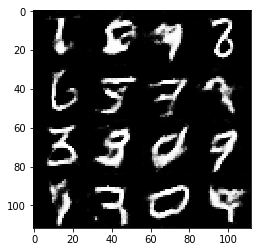

Epoch 2/2... Generator Loss: 0.6565 Discriminator Loss: 1.2460...
Epoch 2/2... Generator Loss: 1.0057 Discriminator Loss: 1.1067...
Epoch 2/2... Generator Loss: 1.3827 Discriminator Loss: 1.1334...
Epoch 2/2... Generator Loss: 0.8953 Discriminator Loss: 1.1122...
Epoch 2/2... Generator Loss: 1.6973 Discriminator Loss: 1.1095...
Epoch 2/2... Generator Loss: 0.7001 Discriminator Loss: 1.2713...
Epoch 2/2... Generator Loss: 1.4320 Discriminator Loss: 1.0365...
Epoch 2/2... Generator Loss: 1.2534 Discriminator Loss: 1.1021...
Epoch 2/2... Generator Loss: 1.1772 Discriminator Loss: 0.9960...
Epoch 2/2... Generator Loss: 1.3774 Discriminator Loss: 0.9378...


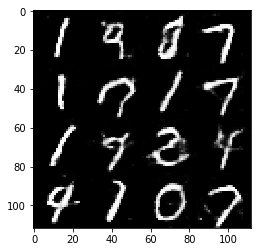

Epoch 2/2... Generator Loss: 1.2555 Discriminator Loss: 1.1048...
Epoch 2/2... Generator Loss: 1.1731 Discriminator Loss: 0.9528...
Epoch 2/2... Generator Loss: 2.6342 Discriminator Loss: 1.4296...


In [42]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

initial output:


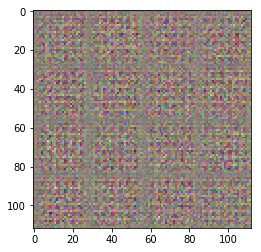

Epoch 1/1... Generator Loss: 1.0524 Discriminator Loss: 1.0041...
Epoch 1/1... Generator Loss: 2.0639 Discriminator Loss: 0.6390...
Epoch 1/1... Generator Loss: 0.4928 Discriminator Loss: 1.9902...
Epoch 1/1... Generator Loss: 1.1750 Discriminator Loss: 0.8520...
Epoch 1/1... Generator Loss: 0.8379 Discriminator Loss: 1.1287...
Epoch 1/1... Generator Loss: 0.6050 Discriminator Loss: 1.4771...
Epoch 1/1... Generator Loss: 1.8415 Discriminator Loss: 0.7168...
Epoch 1/1... Generator Loss: 2.7420 Discriminator Loss: 0.6195...
Epoch 1/1... Generator Loss: 3.2719 Discriminator Loss: 0.5016...
Epoch 1/1... Generator Loss: 2.1571 Discriminator Loss: 0.6196...


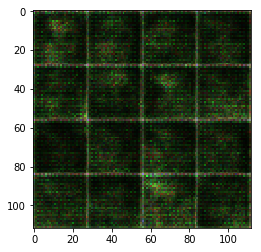

Epoch 1/1... Generator Loss: 4.9083 Discriminator Loss: 0.5460...
Epoch 1/1... Generator Loss: 0.2968 Discriminator Loss: 2.1958...
Epoch 1/1... Generator Loss: 1.1108 Discriminator Loss: 0.8212...
Epoch 1/1... Generator Loss: 3.2412 Discriminator Loss: 0.5907...
Epoch 1/1... Generator Loss: 2.7476 Discriminator Loss: 0.4602...
Epoch 1/1... Generator Loss: 2.2487 Discriminator Loss: 0.5272...
Epoch 1/1... Generator Loss: 2.4805 Discriminator Loss: 0.5212...
Epoch 1/1... Generator Loss: 5.6400 Discriminator Loss: 2.2344...
Epoch 1/1... Generator Loss: 1.2752 Discriminator Loss: 0.9134...
Epoch 1/1... Generator Loss: 1.3404 Discriminator Loss: 0.8476...


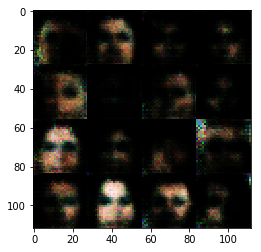

Epoch 1/1... Generator Loss: 0.2350 Discriminator Loss: 2.3226...
Epoch 1/1... Generator Loss: 1.5591 Discriminator Loss: 0.9251...
Epoch 1/1... Generator Loss: 0.8628 Discriminator Loss: 1.1315...
Epoch 1/1... Generator Loss: 0.8937 Discriminator Loss: 1.0716...
Epoch 1/1... Generator Loss: 1.9623 Discriminator Loss: 0.7274...
Epoch 1/1... Generator Loss: 0.8704 Discriminator Loss: 1.0647...
Epoch 1/1... Generator Loss: 0.6015 Discriminator Loss: 1.4644...
Epoch 1/1... Generator Loss: 1.4603 Discriminator Loss: 0.8478...
Epoch 1/1... Generator Loss: 0.4684 Discriminator Loss: 1.4921...
Epoch 1/1... Generator Loss: 1.8980 Discriminator Loss: 0.6742...


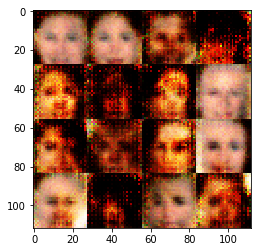

Epoch 1/1... Generator Loss: 1.4197 Discriminator Loss: 0.8697...
Epoch 1/1... Generator Loss: 2.0483 Discriminator Loss: 0.8334...
Epoch 1/1... Generator Loss: 2.2365 Discriminator Loss: 0.6309...
Epoch 1/1... Generator Loss: 1.8860 Discriminator Loss: 0.8353...
Epoch 1/1... Generator Loss: 0.6666 Discriminator Loss: 1.3507...
Epoch 1/1... Generator Loss: 1.6969 Discriminator Loss: 0.7599...
Epoch 1/1... Generator Loss: 1.3040 Discriminator Loss: 0.7799...
Epoch 1/1... Generator Loss: 0.2177 Discriminator Loss: 2.2122...
Epoch 1/1... Generator Loss: 1.4333 Discriminator Loss: 0.9565...
Epoch 1/1... Generator Loss: 2.4763 Discriminator Loss: 0.9221...


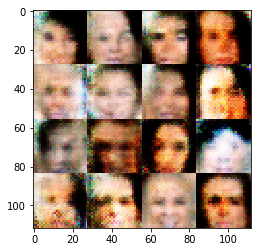

Epoch 1/1... Generator Loss: 0.4772 Discriminator Loss: 1.7376...
Epoch 1/1... Generator Loss: 0.9451 Discriminator Loss: 1.0102...
Epoch 1/1... Generator Loss: 0.4322 Discriminator Loss: 1.6987...
Epoch 1/1... Generator Loss: 1.4212 Discriminator Loss: 0.7927...
Epoch 1/1... Generator Loss: 1.8111 Discriminator Loss: 0.8977...
Epoch 1/1... Generator Loss: 1.0439 Discriminator Loss: 0.8921...
Epoch 1/1... Generator Loss: 3.3394 Discriminator Loss: 2.0827...
Epoch 1/1... Generator Loss: 1.1870 Discriminator Loss: 0.8618...
Epoch 1/1... Generator Loss: 0.5137 Discriminator Loss: 1.4054...
Epoch 1/1... Generator Loss: 0.7404 Discriminator Loss: 1.3183...


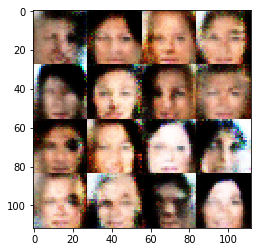

Epoch 1/1... Generator Loss: 1.5168 Discriminator Loss: 0.6845...
Epoch 1/1... Generator Loss: 1.9871 Discriminator Loss: 0.9423...
Epoch 1/1... Generator Loss: 1.5466 Discriminator Loss: 0.7843...
Epoch 1/1... Generator Loss: 1.9923 Discriminator Loss: 0.7283...
Epoch 1/1... Generator Loss: 1.4651 Discriminator Loss: 0.9932...
Epoch 1/1... Generator Loss: 1.2079 Discriminator Loss: 0.9205...
Epoch 1/1... Generator Loss: 1.8066 Discriminator Loss: 0.8487...
Epoch 1/1... Generator Loss: 1.3983 Discriminator Loss: 0.7357...
Epoch 1/1... Generator Loss: 1.2005 Discriminator Loss: 0.8274...
Epoch 1/1... Generator Loss: 0.6618 Discriminator Loss: 1.3408...


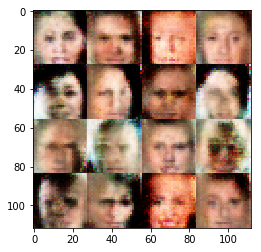

Epoch 1/1... Generator Loss: 1.5735 Discriminator Loss: 0.7359...
Epoch 1/1... Generator Loss: 1.7465 Discriminator Loss: 0.6833...
Epoch 1/1... Generator Loss: 0.6810 Discriminator Loss: 1.1268...
Epoch 1/1... Generator Loss: 0.2418 Discriminator Loss: 1.9366...
Epoch 1/1... Generator Loss: 1.4742 Discriminator Loss: 0.9483...
Epoch 1/1... Generator Loss: 0.7120 Discriminator Loss: 1.1991...
Epoch 1/1... Generator Loss: 1.0230 Discriminator Loss: 0.9640...
Epoch 1/1... Generator Loss: 0.7435 Discriminator Loss: 1.1031...
Epoch 1/1... Generator Loss: 0.8415 Discriminator Loss: 0.9769...
Epoch 1/1... Generator Loss: 1.5124 Discriminator Loss: 0.8410...


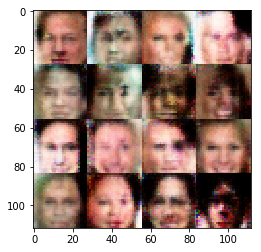

Epoch 1/1... Generator Loss: 0.9312 Discriminator Loss: 1.0289...
Epoch 1/1... Generator Loss: 1.3299 Discriminator Loss: 1.1368...
Epoch 1/1... Generator Loss: 1.1873 Discriminator Loss: 0.8464...
Epoch 1/1... Generator Loss: 1.3598 Discriminator Loss: 0.8557...
Epoch 1/1... Generator Loss: 0.1852 Discriminator Loss: 2.7157...
Epoch 1/1... Generator Loss: 3.6459 Discriminator Loss: 1.7871...
Epoch 1/1... Generator Loss: 1.5870 Discriminator Loss: 0.8000...
Epoch 1/1... Generator Loss: 1.4936 Discriminator Loss: 1.0727...
Epoch 1/1... Generator Loss: 1.4077 Discriminator Loss: 0.7959...
Epoch 1/1... Generator Loss: 0.9750 Discriminator Loss: 0.9538...


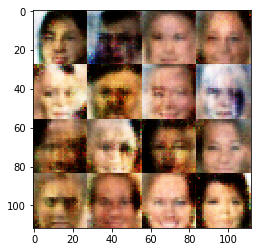

Epoch 1/1... Generator Loss: 1.2691 Discriminator Loss: 0.8592...
Epoch 1/1... Generator Loss: 0.5312 Discriminator Loss: 1.3156...
Epoch 1/1... Generator Loss: 1.7449 Discriminator Loss: 0.9952...
Epoch 1/1... Generator Loss: 2.8386 Discriminator Loss: 1.8790...
Epoch 1/1... Generator Loss: 0.8948 Discriminator Loss: 1.1643...
Epoch 1/1... Generator Loss: 2.5513 Discriminator Loss: 1.5431...
Epoch 1/1... Generator Loss: 1.0245 Discriminator Loss: 1.0650...
Epoch 1/1... Generator Loss: 0.7963 Discriminator Loss: 1.0782...
Epoch 1/1... Generator Loss: 1.8217 Discriminator Loss: 1.0579...
Epoch 1/1... Generator Loss: 1.2288 Discriminator Loss: 0.9271...


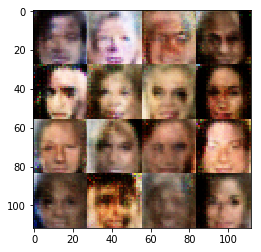

Epoch 1/1... Generator Loss: 0.4280 Discriminator Loss: 1.4365...
Epoch 1/1... Generator Loss: 0.8183 Discriminator Loss: 1.1359...
Epoch 1/1... Generator Loss: 0.7425 Discriminator Loss: 1.1979...
Epoch 1/1... Generator Loss: 0.6459 Discriminator Loss: 1.4092...
Epoch 1/1... Generator Loss: 1.3448 Discriminator Loss: 1.1491...
Epoch 1/1... Generator Loss: 1.4416 Discriminator Loss: 0.9873...
Epoch 1/1... Generator Loss: 0.2602 Discriminator Loss: 2.0065...
Epoch 1/1... Generator Loss: 1.1938 Discriminator Loss: 1.0201...
Epoch 1/1... Generator Loss: 0.9961 Discriminator Loss: 0.9722...
Epoch 1/1... Generator Loss: 0.7024 Discriminator Loss: 1.2412...


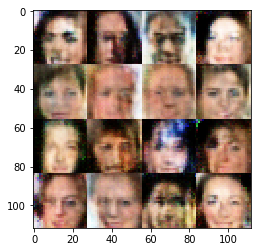

Epoch 1/1... Generator Loss: 0.7736 Discriminator Loss: 1.1906...
Epoch 1/1... Generator Loss: 0.3626 Discriminator Loss: 1.8064...
Epoch 1/1... Generator Loss: 1.0388 Discriminator Loss: 1.0237...
Epoch 1/1... Generator Loss: 0.9999 Discriminator Loss: 0.9861...
Epoch 1/1... Generator Loss: 1.0805 Discriminator Loss: 1.0168...
Epoch 1/1... Generator Loss: 1.6459 Discriminator Loss: 1.0406...
Epoch 1/1... Generator Loss: 2.5225 Discriminator Loss: 1.4645...
Epoch 1/1... Generator Loss: 0.6289 Discriminator Loss: 1.3360...
Epoch 1/1... Generator Loss: 1.3968 Discriminator Loss: 1.2123...
Epoch 1/1... Generator Loss: 0.5056 Discriminator Loss: 1.2058...


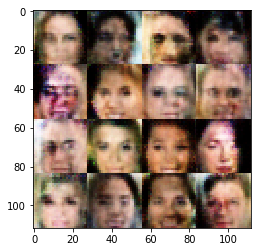

Epoch 1/1... Generator Loss: 0.3786 Discriminator Loss: 1.6945...
Epoch 1/1... Generator Loss: 0.7061 Discriminator Loss: 1.1620...
Epoch 1/1... Generator Loss: 1.2377 Discriminator Loss: 1.2403...
Epoch 1/1... Generator Loss: 0.3952 Discriminator Loss: 1.6707...
Epoch 1/1... Generator Loss: 0.5909 Discriminator Loss: 1.1287...
Epoch 1/1... Generator Loss: 1.5890 Discriminator Loss: 0.9330...
Epoch 1/1... Generator Loss: 0.7936 Discriminator Loss: 1.3551...
Epoch 1/1... Generator Loss: 1.5320 Discriminator Loss: 1.0953...
Epoch 1/1... Generator Loss: 0.9291 Discriminator Loss: 1.2498...
Epoch 1/1... Generator Loss: 1.1373 Discriminator Loss: 1.1214...


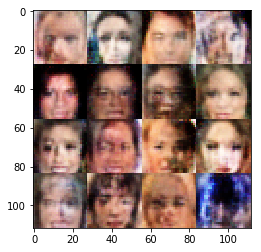

Epoch 1/1... Generator Loss: 0.3285 Discriminator Loss: 1.6725...
Epoch 1/1... Generator Loss: 0.7741 Discriminator Loss: 1.2727...
Epoch 1/1... Generator Loss: 1.2216 Discriminator Loss: 0.9344...
Epoch 1/1... Generator Loss: 1.4989 Discriminator Loss: 1.4467...
Epoch 1/1... Generator Loss: 0.9927 Discriminator Loss: 1.3212...
Epoch 1/1... Generator Loss: 0.7691 Discriminator Loss: 1.1768...
Epoch 1/1... Generator Loss: 0.8750 Discriminator Loss: 1.1255...
Epoch 1/1... Generator Loss: 0.4718 Discriminator Loss: 1.5301...
Epoch 1/1... Generator Loss: 0.5752 Discriminator Loss: 1.3487...
Epoch 1/1... Generator Loss: 0.6875 Discriminator Loss: 1.2164...


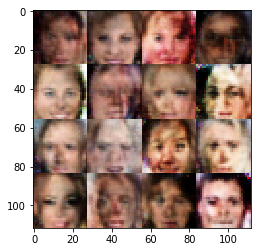

Epoch 1/1... Generator Loss: 1.1789 Discriminator Loss: 1.2951...
Epoch 1/1... Generator Loss: 0.7713 Discriminator Loss: 1.2104...
Epoch 1/1... Generator Loss: 0.4099 Discriminator Loss: 1.5903...
Epoch 1/1... Generator Loss: 0.7320 Discriminator Loss: 1.3724...
Epoch 1/1... Generator Loss: 0.4935 Discriminator Loss: 1.3116...
Epoch 1/1... Generator Loss: 1.0944 Discriminator Loss: 1.2424...
Epoch 1/1... Generator Loss: 0.7199 Discriminator Loss: 1.2132...
Epoch 1/1... Generator Loss: 0.9043 Discriminator Loss: 1.3479...
Epoch 1/1... Generator Loss: 1.6520 Discriminator Loss: 0.7406...
Epoch 1/1... Generator Loss: 0.6502 Discriminator Loss: 1.4237...


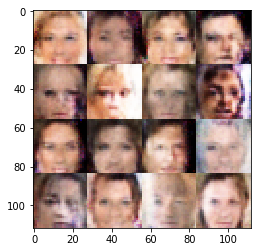

Epoch 1/1... Generator Loss: 0.5879 Discriminator Loss: 1.4478...
Epoch 1/1... Generator Loss: 0.4633 Discriminator Loss: 1.5325...
Epoch 1/1... Generator Loss: 0.3419 Discriminator Loss: 1.7701...
Epoch 1/1... Generator Loss: 0.6409 Discriminator Loss: 1.2433...
Epoch 1/1... Generator Loss: 0.4708 Discriminator Loss: 1.5454...
Epoch 1/1... Generator Loss: 0.7358 Discriminator Loss: 1.2361...
Epoch 1/1... Generator Loss: 0.5196 Discriminator Loss: 1.4387...
Epoch 1/1... Generator Loss: 0.6387 Discriminator Loss: 1.2908...
Epoch 1/1... Generator Loss: 0.3241 Discriminator Loss: 1.8698...
Epoch 1/1... Generator Loss: 0.6996 Discriminator Loss: 1.2463...


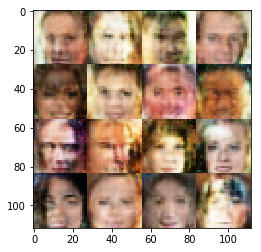

Epoch 1/1... Generator Loss: 0.5575 Discriminator Loss: 1.3148...
Epoch 1/1... Generator Loss: 0.4582 Discriminator Loss: 1.5057...
Epoch 1/1... Generator Loss: 0.7658 Discriminator Loss: 1.2240...
Epoch 1/1... Generator Loss: 0.5999 Discriminator Loss: 1.3306...
Epoch 1/1... Generator Loss: 0.8450 Discriminator Loss: 1.3275...
Epoch 1/1... Generator Loss: 0.8737 Discriminator Loss: 1.1350...
Epoch 1/1... Generator Loss: 0.7132 Discriminator Loss: 1.2617...
Epoch 1/1... Generator Loss: 1.0089 Discriminator Loss: 1.0314...
Epoch 1/1... Generator Loss: 0.2552 Discriminator Loss: 2.1903...
Epoch 1/1... Generator Loss: 0.4848 Discriminator Loss: 1.4718...


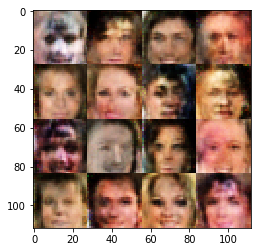

Epoch 1/1... Generator Loss: 0.8087 Discriminator Loss: 1.3820...
Epoch 1/1... Generator Loss: 0.6280 Discriminator Loss: 1.3370...
Epoch 1/1... Generator Loss: 0.6310 Discriminator Loss: 1.4719...
Epoch 1/1... Generator Loss: 0.2832 Discriminator Loss: 1.9370...
Epoch 1/1... Generator Loss: 0.5031 Discriminator Loss: 1.4795...
Epoch 1/1... Generator Loss: 0.6140 Discriminator Loss: 1.3093...
Epoch 1/1... Generator Loss: 0.3968 Discriminator Loss: 1.6922...
Epoch 1/1... Generator Loss: 0.9331 Discriminator Loss: 1.2178...
Epoch 1/1... Generator Loss: 0.6133 Discriminator Loss: 1.3923...
Epoch 1/1... Generator Loss: 0.4846 Discriminator Loss: 1.5429...


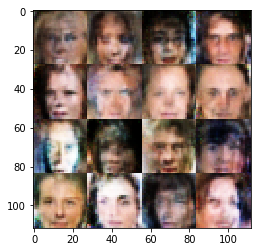

Epoch 1/1... Generator Loss: 0.6512 Discriminator Loss: 1.3966...
Epoch 1/1... Generator Loss: 0.8792 Discriminator Loss: 1.6558...
Epoch 1/1... Generator Loss: 0.5275 Discriminator Loss: 1.5011...
Epoch 1/1... Generator Loss: 0.9574 Discriminator Loss: 1.3082...
Epoch 1/1... Generator Loss: 0.4500 Discriminator Loss: 1.5945...
Epoch 1/1... Generator Loss: 0.6105 Discriminator Loss: 1.3096...
Epoch 1/1... Generator Loss: 0.6749 Discriminator Loss: 1.3654...
Epoch 1/1... Generator Loss: 0.5108 Discriminator Loss: 1.6717...
Epoch 1/1... Generator Loss: 0.2259 Discriminator Loss: 2.2025...
Epoch 1/1... Generator Loss: 0.2757 Discriminator Loss: 1.9976...


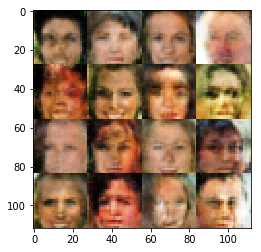

Epoch 1/1... Generator Loss: 0.4634 Discriminator Loss: 1.5360...
Epoch 1/1... Generator Loss: 0.4298 Discriminator Loss: 1.5358...
Epoch 1/1... Generator Loss: 0.3634 Discriminator Loss: 1.6256...
Epoch 1/1... Generator Loss: 0.4909 Discriminator Loss: 1.5366...
Epoch 1/1... Generator Loss: 0.5479 Discriminator Loss: 1.4173...
Epoch 1/1... Generator Loss: 0.4908 Discriminator Loss: 1.5417...
Epoch 1/1... Generator Loss: 0.4867 Discriminator Loss: 1.5990...
Epoch 1/1... Generator Loss: 0.5080 Discriminator Loss: 1.4627...
Epoch 1/1... Generator Loss: 0.5958 Discriminator Loss: 1.2547...
Epoch 1/1... Generator Loss: 0.4139 Discriminator Loss: 1.5521...


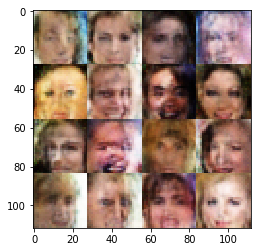

Epoch 1/1... Generator Loss: 0.9598 Discriminator Loss: 1.1769...
Epoch 1/1... Generator Loss: 0.5753 Discriminator Loss: 1.4883...
Epoch 1/1... Generator Loss: 0.4974 Discriminator Loss: 1.3769...
Epoch 1/1... Generator Loss: 0.6136 Discriminator Loss: 1.5878...
Epoch 1/1... Generator Loss: 0.5205 Discriminator Loss: 1.5266...
Epoch 1/1... Generator Loss: 0.3745 Discriminator Loss: 1.6280...
Epoch 1/1... Generator Loss: 0.4851 Discriminator Loss: 1.4286...
Epoch 1/1... Generator Loss: 0.6140 Discriminator Loss: 1.5550...
Epoch 1/1... Generator Loss: 0.6253 Discriminator Loss: 1.3844...
Epoch 1/1... Generator Loss: 0.7607 Discriminator Loss: 1.3198...


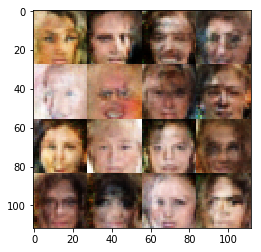

Epoch 1/1... Generator Loss: 0.8348 Discriminator Loss: 1.4457...
Epoch 1/1... Generator Loss: 0.7666 Discriminator Loss: 1.2700...
Epoch 1/1... Generator Loss: 0.6526 Discriminator Loss: 1.4998...
Epoch 1/1... Generator Loss: 0.5672 Discriminator Loss: 1.5596...
Epoch 1/1... Generator Loss: 0.7555 Discriminator Loss: 1.2224...
Epoch 1/1... Generator Loss: 0.6610 Discriminator Loss: 1.6248...
Epoch 1/1... Generator Loss: 0.4492 Discriminator Loss: 1.6135...
Epoch 1/1... Generator Loss: 0.5024 Discriminator Loss: 1.3398...
Epoch 1/1... Generator Loss: 0.5884 Discriminator Loss: 1.3379...
Epoch 1/1... Generator Loss: 0.3070 Discriminator Loss: 1.6781...


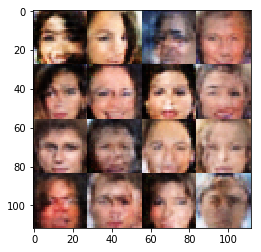

Epoch 1/1... Generator Loss: 0.4994 Discriminator Loss: 1.5009...
Epoch 1/1... Generator Loss: 0.5606 Discriminator Loss: 1.4811...
Epoch 1/1... Generator Loss: 0.7779 Discriminator Loss: 1.1564...
Epoch 1/1... Generator Loss: 0.7025 Discriminator Loss: 1.2435...
Epoch 1/1... Generator Loss: 0.3742 Discriminator Loss: 1.7235...
Epoch 1/1... Generator Loss: 0.9970 Discriminator Loss: 1.3655...
Epoch 1/1... Generator Loss: 0.4489 Discriminator Loss: 1.5451...
Epoch 1/1... Generator Loss: 0.5979 Discriminator Loss: 1.4049...
Epoch 1/1... Generator Loss: 0.5611 Discriminator Loss: 1.3806...
Epoch 1/1... Generator Loss: 0.5322 Discriminator Loss: 1.5356...


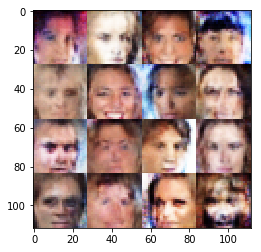

Epoch 1/1... Generator Loss: 0.6452 Discriminator Loss: 1.4583...
Epoch 1/1... Generator Loss: 0.2554 Discriminator Loss: 2.2224...
Epoch 1/1... Generator Loss: 0.6548 Discriminator Loss: 1.6132...
Epoch 1/1... Generator Loss: 0.3958 Discriminator Loss: 1.7732...
Epoch 1/1... Generator Loss: 0.7442 Discriminator Loss: 1.3336...
Epoch 1/1... Generator Loss: 0.3932 Discriminator Loss: 1.7553...
Epoch 1/1... Generator Loss: 0.6022 Discriminator Loss: 1.6150...
Epoch 1/1... Generator Loss: 0.3232 Discriminator Loss: 1.9841...
Epoch 1/1... Generator Loss: 0.7420 Discriminator Loss: 1.1757...
Epoch 1/1... Generator Loss: 0.9335 Discriminator Loss: 1.0776...


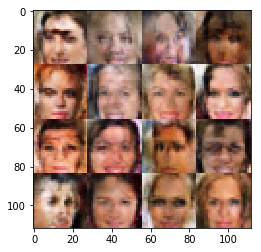

Epoch 1/1... Generator Loss: 0.6352 Discriminator Loss: 1.4724...
Epoch 1/1... Generator Loss: 0.6068 Discriminator Loss: 1.5849...
Epoch 1/1... Generator Loss: 0.8890 Discriminator Loss: 1.2239...
Epoch 1/1... Generator Loss: 0.8407 Discriminator Loss: 1.3086...
Epoch 1/1... Generator Loss: 0.5332 Discriminator Loss: 1.5285...
Epoch 1/1... Generator Loss: 0.8065 Discriminator Loss: 1.2746...
Epoch 1/1... Generator Loss: 0.9453 Discriminator Loss: 1.2298...
Epoch 1/1... Generator Loss: 0.5749 Discriminator Loss: 1.4840...
Epoch 1/1... Generator Loss: 0.4723 Discriminator Loss: 1.6475...
Epoch 1/1... Generator Loss: 0.6310 Discriminator Loss: 1.3072...


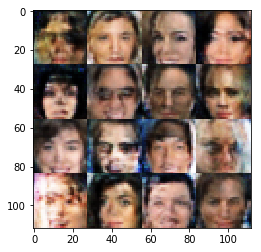

Epoch 1/1... Generator Loss: 0.3543 Discriminator Loss: 1.8067...
Epoch 1/1... Generator Loss: 0.7432 Discriminator Loss: 1.4871...
Epoch 1/1... Generator Loss: 0.5049 Discriminator Loss: 1.4295...
Epoch 1/1... Generator Loss: 0.4323 Discriminator Loss: 1.7753...
Epoch 1/1... Generator Loss: 0.3241 Discriminator Loss: 1.6421...
Epoch 1/1... Generator Loss: 0.5946 Discriminator Loss: 1.3848...
Epoch 1/1... Generator Loss: 0.4289 Discriminator Loss: 1.4429...
Epoch 1/1... Generator Loss: 0.5788 Discriminator Loss: 1.5442...
Epoch 1/1... Generator Loss: 0.5263 Discriminator Loss: 1.6301...
Epoch 1/1... Generator Loss: 1.0913 Discriminator Loss: 1.2596...


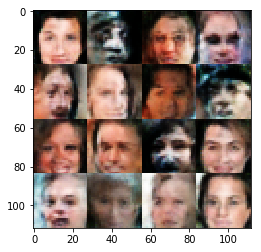

Epoch 1/1... Generator Loss: 0.5986 Discriminator Loss: 1.5775...
Epoch 1/1... Generator Loss: 0.8135 Discriminator Loss: 1.3196...
Epoch 1/1... Generator Loss: 1.0220 Discriminator Loss: 1.0959...
Epoch 1/1... Generator Loss: 0.6727 Discriminator Loss: 1.4456...
Epoch 1/1... Generator Loss: 0.5266 Discriminator Loss: 1.3615...
Epoch 1/1... Generator Loss: 0.5003 Discriminator Loss: 1.4731...
Epoch 1/1... Generator Loss: 0.4066 Discriminator Loss: 1.6081...
Epoch 1/1... Generator Loss: 0.8567 Discriminator Loss: 1.1482...
Epoch 1/1... Generator Loss: 0.6893 Discriminator Loss: 1.4329...
Epoch 1/1... Generator Loss: 0.8528 Discriminator Loss: 1.3418...


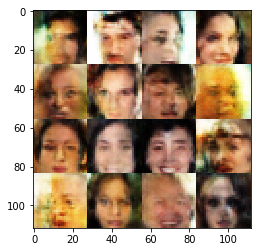

Epoch 1/1... Generator Loss: 0.6128 Discriminator Loss: 1.3833...
Epoch 1/1... Generator Loss: 0.5084 Discriminator Loss: 1.6765...
Epoch 1/1... Generator Loss: 0.7076 Discriminator Loss: 1.4105...
Epoch 1/1... Generator Loss: 0.5493 Discriminator Loss: 1.5795...
Epoch 1/1... Generator Loss: 0.6812 Discriminator Loss: 1.3087...
Epoch 1/1... Generator Loss: 0.3288 Discriminator Loss: 1.9033...
Epoch 1/1... Generator Loss: 0.9287 Discriminator Loss: 1.1909...
Epoch 1/1... Generator Loss: 0.6648 Discriminator Loss: 1.2855...
Epoch 1/1... Generator Loss: 1.0282 Discriminator Loss: 0.9935...
Epoch 1/1... Generator Loss: 0.4370 Discriminator Loss: 1.6097...


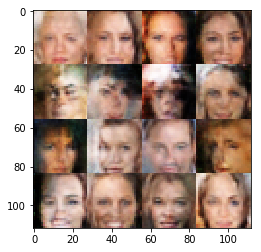

Epoch 1/1... Generator Loss: 0.5448 Discriminator Loss: 1.4195...
Epoch 1/1... Generator Loss: 0.5739 Discriminator Loss: 1.4944...
Epoch 1/1... Generator Loss: 0.5511 Discriminator Loss: 1.6058...
Epoch 1/1... Generator Loss: 0.6204 Discriminator Loss: 1.5543...
Epoch 1/1... Generator Loss: 0.6885 Discriminator Loss: 1.2748...
Epoch 1/1... Generator Loss: 0.6231 Discriminator Loss: 1.3183...
Epoch 1/1... Generator Loss: 0.4065 Discriminator Loss: 1.7322...
Epoch 1/1... Generator Loss: 0.3164 Discriminator Loss: 1.6764...
Epoch 1/1... Generator Loss: 0.6661 Discriminator Loss: 1.3593...
Epoch 1/1... Generator Loss: 0.9096 Discriminator Loss: 1.0876...


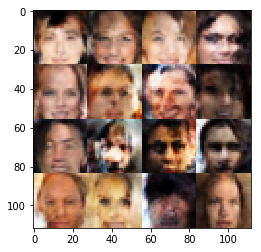

Epoch 1/1... Generator Loss: 0.4388 Discriminator Loss: 1.8603...
Epoch 1/1... Generator Loss: 1.2177 Discriminator Loss: 1.4496...
Epoch 1/1... Generator Loss: 0.8703 Discriminator Loss: 1.2577...
Epoch 1/1... Generator Loss: 1.0359 Discriminator Loss: 1.2936...
Epoch 1/1... Generator Loss: 0.5938 Discriminator Loss: 1.4241...
Epoch 1/1... Generator Loss: 0.4691 Discriminator Loss: 1.5122...
Epoch 1/1... Generator Loss: 0.6499 Discriminator Loss: 1.2676...
Epoch 1/1... Generator Loss: 0.5125 Discriminator Loss: 1.6024...
Epoch 1/1... Generator Loss: 0.8093 Discriminator Loss: 1.2753...
Epoch 1/1... Generator Loss: 0.5883 Discriminator Loss: 1.3317...


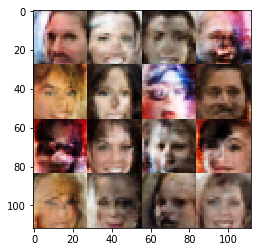

Epoch 1/1... Generator Loss: 0.4361 Discriminator Loss: 1.4902...
Epoch 1/1... Generator Loss: 0.5153 Discriminator Loss: 1.3486...
Epoch 1/1... Generator Loss: 0.5029 Discriminator Loss: 1.5473...
Epoch 1/1... Generator Loss: 0.2774 Discriminator Loss: 1.9354...
Epoch 1/1... Generator Loss: 0.5180 Discriminator Loss: 1.6298...
Epoch 1/1... Generator Loss: 0.4180 Discriminator Loss: 1.8367...
Epoch 1/1... Generator Loss: 0.4877 Discriminator Loss: 1.5714...
Epoch 1/1... Generator Loss: 0.4806 Discriminator Loss: 1.4407...
Epoch 1/1... Generator Loss: 0.4276 Discriminator Loss: 1.7219...
Epoch 1/1... Generator Loss: 0.4103 Discriminator Loss: 1.5003...


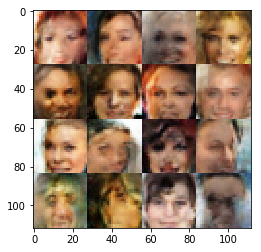

Epoch 1/1... Generator Loss: 0.4390 Discriminator Loss: 1.6434...
Epoch 1/1... Generator Loss: 0.5580 Discriminator Loss: 1.4712...
Epoch 1/1... Generator Loss: 0.5558 Discriminator Loss: 1.6095...
Epoch 1/1... Generator Loss: 0.4231 Discriminator Loss: 1.6194...
Epoch 1/1... Generator Loss: 0.3630 Discriminator Loss: 1.6765...
Epoch 1/1... Generator Loss: 0.4618 Discriminator Loss: 1.8335...
Epoch 1/1... Generator Loss: 0.4657 Discriminator Loss: 1.4972...
Epoch 1/1... Generator Loss: 0.5403 Discriminator Loss: 1.4312...
Epoch 1/1... Generator Loss: 0.2950 Discriminator Loss: 1.8425...
Epoch 1/1... Generator Loss: 0.4642 Discriminator Loss: 1.4880...


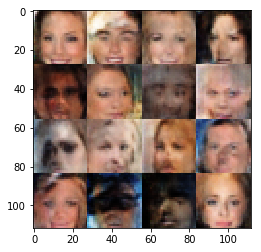

Epoch 1/1... Generator Loss: 0.5565 Discriminator Loss: 1.7036...
Epoch 1/1... Generator Loss: 0.4554 Discriminator Loss: 1.6982...
Epoch 1/1... Generator Loss: 0.9190 Discriminator Loss: 1.1917...
Epoch 1/1... Generator Loss: 0.5154 Discriminator Loss: 1.3917...
Epoch 1/1... Generator Loss: 0.7251 Discriminator Loss: 1.4469...
Epoch 1/1... Generator Loss: 0.7527 Discriminator Loss: 1.2223...
Epoch 1/1... Generator Loss: 0.6955 Discriminator Loss: 1.2995...
Epoch 1/1... Generator Loss: 0.7711 Discriminator Loss: 1.2226...
Epoch 1/1... Generator Loss: 0.8618 Discriminator Loss: 1.2639...
Epoch 1/1... Generator Loss: 0.5078 Discriminator Loss: 1.3982...


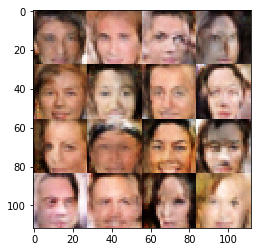

Epoch 1/1... Generator Loss: 1.0752 Discriminator Loss: 1.5197...
Epoch 1/1... Generator Loss: 0.5273 Discriminator Loss: 1.5539...
Epoch 1/1... Generator Loss: 0.5620 Discriminator Loss: 1.4077...
Epoch 1/1... Generator Loss: 0.5698 Discriminator Loss: 1.5604...
Epoch 1/1... Generator Loss: 0.3482 Discriminator Loss: 1.6207...
Epoch 1/1... Generator Loss: 0.6662 Discriminator Loss: 1.4235...
Epoch 1/1... Generator Loss: 0.4917 Discriminator Loss: 1.5745...
Epoch 1/1... Generator Loss: 0.4666 Discriminator Loss: 1.5135...
Epoch 1/1... Generator Loss: 0.7147 Discriminator Loss: 1.3068...
Epoch 1/1... Generator Loss: 0.8218 Discriminator Loss: 1.4534...


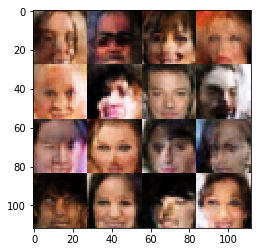

Epoch 1/1... Generator Loss: 0.3836 Discriminator Loss: 1.7953...
Epoch 1/1... Generator Loss: 0.6594 Discriminator Loss: 1.2597...
Epoch 1/1... Generator Loss: 0.3847 Discriminator Loss: 1.7441...
Epoch 1/1... Generator Loss: 0.3868 Discriminator Loss: 1.5222...
Epoch 1/1... Generator Loss: 0.4990 Discriminator Loss: 1.7060...
Epoch 1/1... Generator Loss: 0.7273 Discriminator Loss: 1.3337...
Epoch 1/1... Generator Loss: 0.4962 Discriminator Loss: 1.5555...
Epoch 1/1... Generator Loss: 0.5350 Discriminator Loss: 1.5911...
Epoch 1/1... Generator Loss: 0.7946 Discriminator Loss: 1.3684...
Epoch 1/1... Generator Loss: 0.5541 Discriminator Loss: 1.3539...


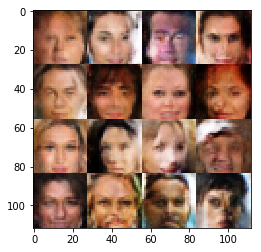

Epoch 1/1... Generator Loss: 0.5400 Discriminator Loss: 1.3822...
Epoch 1/1... Generator Loss: 0.3678 Discriminator Loss: 1.7112...
Epoch 1/1... Generator Loss: 0.5605 Discriminator Loss: 1.4051...
Epoch 1/1... Generator Loss: 0.6800 Discriminator Loss: 1.6082...
Epoch 1/1... Generator Loss: 0.5758 Discriminator Loss: 1.7413...
Epoch 1/1... Generator Loss: 0.5780 Discriminator Loss: 1.4154...
Epoch 1/1... Generator Loss: 0.7977 Discriminator Loss: 1.1994...
Epoch 1/1... Generator Loss: 0.4366 Discriminator Loss: 1.6467...
Epoch 1/1... Generator Loss: 0.7079 Discriminator Loss: 1.2402...
Epoch 1/1... Generator Loss: 0.4049 Discriminator Loss: 1.7239...


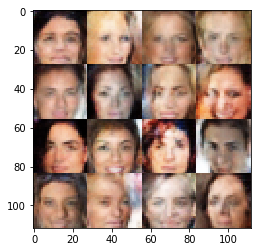

Epoch 1/1... Generator Loss: 0.4528 Discriminator Loss: 1.5588...
Epoch 1/1... Generator Loss: 0.9011 Discriminator Loss: 1.0625...
Epoch 1/1... Generator Loss: 0.4769 Discriminator Loss: 1.5328...
Epoch 1/1... Generator Loss: 1.0615 Discriminator Loss: 0.9466...
Epoch 1/1... Generator Loss: 0.4525 Discriminator Loss: 1.6036...
Epoch 1/1... Generator Loss: 0.6760 Discriminator Loss: 1.4379...
Epoch 1/1... Generator Loss: 0.3715 Discriminator Loss: 1.8670...
Epoch 1/1... Generator Loss: 0.5825 Discriminator Loss: 1.3493...
Epoch 1/1... Generator Loss: 0.6928 Discriminator Loss: 1.3737...
Epoch 1/1... Generator Loss: 0.3807 Discriminator Loss: 1.9057...


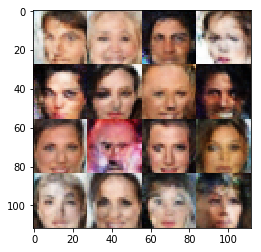

Epoch 1/1... Generator Loss: 0.8214 Discriminator Loss: 1.2628...
Epoch 1/1... Generator Loss: 1.0592 Discriminator Loss: 1.2370...
Epoch 1/1... Generator Loss: 0.8865 Discriminator Loss: 1.3605...
Epoch 1/1... Generator Loss: 0.5842 Discriminator Loss: 1.5905...
Epoch 1/1... Generator Loss: 0.4530 Discriminator Loss: 1.4304...
Epoch 1/1... Generator Loss: 0.6752 Discriminator Loss: 1.6744...
Epoch 1/1... Generator Loss: 0.3608 Discriminator Loss: 1.4907...
Epoch 1/1... Generator Loss: 0.3422 Discriminator Loss: 1.8762...
Epoch 1/1... Generator Loss: 0.4429 Discriminator Loss: 1.4508...
Epoch 1/1... Generator Loss: 0.6130 Discriminator Loss: 1.6362...


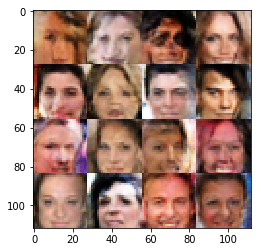

Epoch 1/1... Generator Loss: 0.7033 Discriminator Loss: 1.3542...
Epoch 1/1... Generator Loss: 0.7492 Discriminator Loss: 1.3128...
Epoch 1/1... Generator Loss: 0.9054 Discriminator Loss: 1.4034...
Epoch 1/1... Generator Loss: 0.5429 Discriminator Loss: 1.7407...
Epoch 1/1... Generator Loss: 0.3559 Discriminator Loss: 1.6428...
Epoch 1/1... Generator Loss: 0.7085 Discriminator Loss: 1.4535...
Epoch 1/1... Generator Loss: 0.4973 Discriminator Loss: 1.3724...
Epoch 1/1... Generator Loss: 0.8309 Discriminator Loss: 1.1547...
Epoch 1/1... Generator Loss: 0.7791 Discriminator Loss: 1.4413...
Epoch 1/1... Generator Loss: 0.8244 Discriminator Loss: 1.2813...


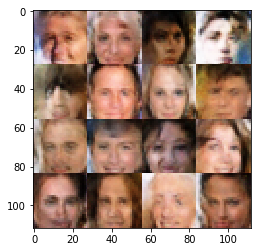

Epoch 1/1... Generator Loss: 0.7465 Discriminator Loss: 1.3355...
Epoch 1/1... Generator Loss: 0.7101 Discriminator Loss: 1.3796...
Epoch 1/1... Generator Loss: 0.7541 Discriminator Loss: 1.3418...
Epoch 1/1... Generator Loss: 0.3565 Discriminator Loss: 1.6746...
Epoch 1/1... Generator Loss: 0.4940 Discriminator Loss: 1.6516...
Epoch 1/1... Generator Loss: 0.4031 Discriminator Loss: 1.5247...
Epoch 1/1... Generator Loss: 0.5697 Discriminator Loss: 1.3849...
Epoch 1/1... Generator Loss: 0.6778 Discriminator Loss: 1.2924...
Epoch 1/1... Generator Loss: 0.4289 Discriminator Loss: 1.5831...
Epoch 1/1... Generator Loss: 0.7519 Discriminator Loss: 1.2381...


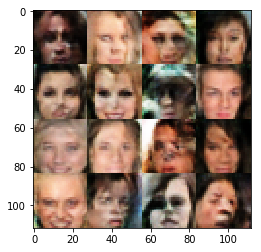

Epoch 1/1... Generator Loss: 0.4079 Discriminator Loss: 1.6428...
Epoch 1/1... Generator Loss: 0.6823 Discriminator Loss: 1.5669...
Epoch 1/1... Generator Loss: 0.4401 Discriminator Loss: 1.6105...
Epoch 1/1... Generator Loss: 0.6809 Discriminator Loss: 1.3378...
Epoch 1/1... Generator Loss: 0.4711 Discriminator Loss: 1.5993...
Epoch 1/1... Generator Loss: 0.8043 Discriminator Loss: 1.2447...
Epoch 1/1... Generator Loss: 0.7309 Discriminator Loss: 1.1318...
Epoch 1/1... Generator Loss: 0.8752 Discriminator Loss: 1.2111...
Epoch 1/1... Generator Loss: 0.7559 Discriminator Loss: 1.2393...
Epoch 1/1... Generator Loss: 0.4843 Discriminator Loss: 1.5440...


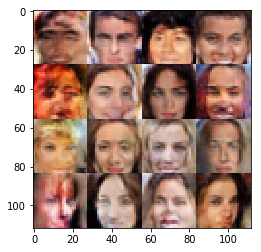

Epoch 1/1... Generator Loss: 0.4687 Discriminator Loss: 1.5747...
Epoch 1/1... Generator Loss: 0.6766 Discriminator Loss: 1.3572...
Epoch 1/1... Generator Loss: 0.4894 Discriminator Loss: 1.4499...
Epoch 1/1... Generator Loss: 0.4494 Discriminator Loss: 1.5439...
Epoch 1/1... Generator Loss: 0.8070 Discriminator Loss: 1.3513...
Epoch 1/1... Generator Loss: 0.5363 Discriminator Loss: 1.5556...
Epoch 1/1... Generator Loss: 0.4788 Discriminator Loss: 1.5271...
Epoch 1/1... Generator Loss: 1.0004 Discriminator Loss: 1.3075...
Epoch 1/1... Generator Loss: 0.3558 Discriminator Loss: 1.7699...
Epoch 1/1... Generator Loss: 0.5632 Discriminator Loss: 1.2679...


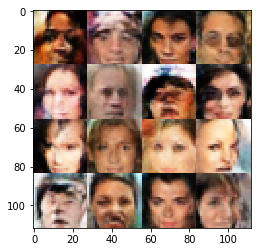

Epoch 1/1... Generator Loss: 0.6435 Discriminator Loss: 1.1964...
Epoch 1/1... Generator Loss: 0.6719 Discriminator Loss: 1.3771...
Epoch 1/1... Generator Loss: 0.4111 Discriminator Loss: 1.5450...
Epoch 1/1... Generator Loss: 0.4377 Discriminator Loss: 1.6525...
Epoch 1/1... Generator Loss: 0.4285 Discriminator Loss: 1.4472...
Epoch 1/1... Generator Loss: 0.4723 Discriminator Loss: 1.6732...
Epoch 1/1... Generator Loss: 0.6761 Discriminator Loss: 1.5272...
Epoch 1/1... Generator Loss: 0.4900 Discriminator Loss: 1.4376...
Epoch 1/1... Generator Loss: 0.8466 Discriminator Loss: 1.1750...
Epoch 1/1... Generator Loss: 0.3949 Discriminator Loss: 1.8487...


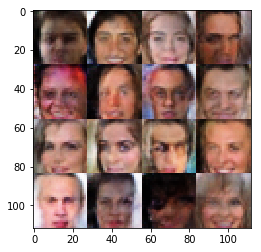

Epoch 1/1... Generator Loss: 0.5482 Discriminator Loss: 1.5056...
Epoch 1/1... Generator Loss: 0.6033 Discriminator Loss: 1.3727...
Epoch 1/1... Generator Loss: 0.8289 Discriminator Loss: 1.4594...
Epoch 1/1... Generator Loss: 0.5865 Discriminator Loss: 1.3385...
Epoch 1/1... Generator Loss: 0.5588 Discriminator Loss: 1.4405...
Epoch 1/1... Generator Loss: 0.9436 Discriminator Loss: 1.3583...
Epoch 1/1... Generator Loss: 0.7969 Discriminator Loss: 1.1734...
Epoch 1/1... Generator Loss: 1.1425 Discriminator Loss: 1.3157...
Epoch 1/1... Generator Loss: 0.6348 Discriminator Loss: 1.3598...
Epoch 1/1... Generator Loss: 0.5536 Discriminator Loss: 1.5566...


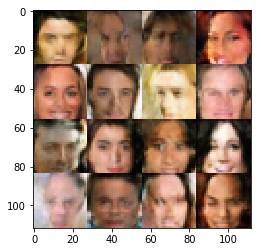

Epoch 1/1... Generator Loss: 0.6950 Discriminator Loss: 1.3764...
Epoch 1/1... Generator Loss: 0.6872 Discriminator Loss: 1.3814...
Epoch 1/1... Generator Loss: 0.5444 Discriminator Loss: 1.3686...
Epoch 1/1... Generator Loss: 0.5544 Discriminator Loss: 1.4558...
Epoch 1/1... Generator Loss: 0.6988 Discriminator Loss: 1.5765...
Epoch 1/1... Generator Loss: 0.8189 Discriminator Loss: 1.2450...
Epoch 1/1... Generator Loss: 0.5576 Discriminator Loss: 1.5701...
Epoch 1/1... Generator Loss: 0.5546 Discriminator Loss: 1.4205...
Epoch 1/1... Generator Loss: 0.6519 Discriminator Loss: 1.3238...
Epoch 1/1... Generator Loss: 0.5568 Discriminator Loss: 1.4206...


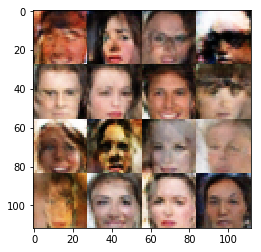

Epoch 1/1... Generator Loss: 0.6023 Discriminator Loss: 1.3869...
Epoch 1/1... Generator Loss: 0.4237 Discriminator Loss: 1.6231...
Epoch 1/1... Generator Loss: 0.5296 Discriminator Loss: 1.5938...
Epoch 1/1... Generator Loss: 0.9992 Discriminator Loss: 1.3150...
Epoch 1/1... Generator Loss: 1.0496 Discriminator Loss: 1.1665...
Epoch 1/1... Generator Loss: 0.9159 Discriminator Loss: 1.2677...
Epoch 1/1... Generator Loss: 0.8716 Discriminator Loss: 1.0755...
Epoch 1/1... Generator Loss: 0.8084 Discriminator Loss: 1.5775...
Epoch 1/1... Generator Loss: 0.6548 Discriminator Loss: 1.3259...
Epoch 1/1... Generator Loss: 0.7119 Discriminator Loss: 1.4406...


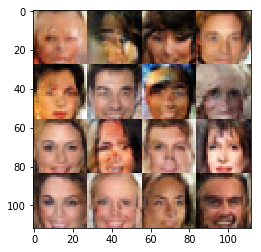

Epoch 1/1... Generator Loss: 0.5266 Discriminator Loss: 1.3747...
Epoch 1/1... Generator Loss: 0.6045 Discriminator Loss: 1.4581...
Epoch 1/1... Generator Loss: 0.8948 Discriminator Loss: 1.1038...
Epoch 1/1... Generator Loss: 0.5243 Discriminator Loss: 1.4763...
Epoch 1/1... Generator Loss: 0.3388 Discriminator Loss: 1.6637...
Epoch 1/1... Generator Loss: 0.7543 Discriminator Loss: 1.4119...
Epoch 1/1... Generator Loss: 0.6652 Discriminator Loss: 1.3177...
Epoch 1/1... Generator Loss: 0.5091 Discriminator Loss: 1.5423...
Epoch 1/1... Generator Loss: 0.5743 Discriminator Loss: 1.5464...
Epoch 1/1... Generator Loss: 0.6254 Discriminator Loss: 1.5456...


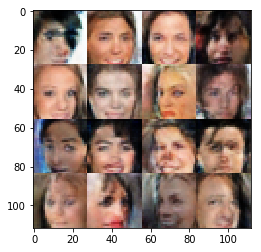

Epoch 1/1... Generator Loss: 0.5706 Discriminator Loss: 1.5485...
Epoch 1/1... Generator Loss: 0.6222 Discriminator Loss: 1.2843...
Epoch 1/1... Generator Loss: 0.4405 Discriminator Loss: 1.4847...
Epoch 1/1... Generator Loss: 0.7551 Discriminator Loss: 1.3029...
Epoch 1/1... Generator Loss: 0.6392 Discriminator Loss: 1.3315...
Epoch 1/1... Generator Loss: 0.4736 Discriminator Loss: 1.5914...
Epoch 1/1... Generator Loss: 0.6225 Discriminator Loss: 1.3564...
Epoch 1/1... Generator Loss: 0.6359 Discriminator Loss: 1.4675...
Epoch 1/1... Generator Loss: 0.5358 Discriminator Loss: 1.5230...
Epoch 1/1... Generator Loss: 0.5423 Discriminator Loss: 1.3665...


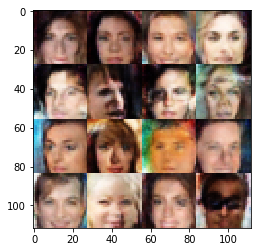

Epoch 1/1... Generator Loss: 0.5265 Discriminator Loss: 1.4405...
Epoch 1/1... Generator Loss: 0.8310 Discriminator Loss: 1.1720...
Epoch 1/1... Generator Loss: 0.7044 Discriminator Loss: 1.3922...
Epoch 1/1... Generator Loss: 0.8806 Discriminator Loss: 1.2305...
Epoch 1/1... Generator Loss: 0.7445 Discriminator Loss: 1.1843...
Epoch 1/1... Generator Loss: 0.5793 Discriminator Loss: 1.4439...
Epoch 1/1... Generator Loss: 0.5716 Discriminator Loss: 1.4069...
Epoch 1/1... Generator Loss: 0.5443 Discriminator Loss: 1.3932...
Epoch 1/1... Generator Loss: 0.6987 Discriminator Loss: 1.3378...
Epoch 1/1... Generator Loss: 1.0688 Discriminator Loss: 1.3129...


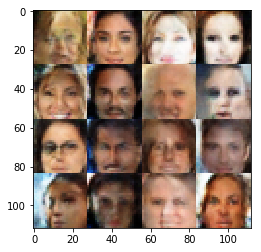

Epoch 1/1... Generator Loss: 0.9724 Discriminator Loss: 1.3769...
Epoch 1/1... Generator Loss: 0.3560 Discriminator Loss: 1.6576...
Epoch 1/1... Generator Loss: 0.3869 Discriminator Loss: 1.5857...
Epoch 1/1... Generator Loss: 0.3750 Discriminator Loss: 1.6766...
Epoch 1/1... Generator Loss: 0.7672 Discriminator Loss: 1.3377...
Epoch 1/1... Generator Loss: 1.0219 Discriminator Loss: 1.0460...
Epoch 1/1... Generator Loss: 0.5866 Discriminator Loss: 1.4787...
Epoch 1/1... Generator Loss: 0.6831 Discriminator Loss: 1.3837...
Epoch 1/1... Generator Loss: 0.6739 Discriminator Loss: 1.6079...
Epoch 1/1... Generator Loss: 0.8329 Discriminator Loss: 1.2838...


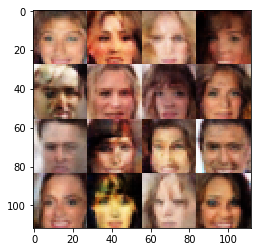

Epoch 1/1... Generator Loss: 0.6298 Discriminator Loss: 1.5443...
Epoch 1/1... Generator Loss: 0.6366 Discriminator Loss: 1.4082...
Epoch 1/1... Generator Loss: 0.5048 Discriminator Loss: 1.4449...
Epoch 1/1... Generator Loss: 0.7219 Discriminator Loss: 1.3447...
Epoch 1/1... Generator Loss: 0.6017 Discriminator Loss: 1.2808...
Epoch 1/1... Generator Loss: 0.4536 Discriminator Loss: 1.7155...
Epoch 1/1... Generator Loss: 1.0466 Discriminator Loss: 1.3202...
Epoch 1/1... Generator Loss: 0.9274 Discriminator Loss: 1.0631...
Epoch 1/1... Generator Loss: 0.5799 Discriminator Loss: 1.4900...
Epoch 1/1... Generator Loss: 0.4584 Discriminator Loss: 1.5351...


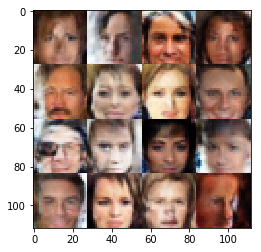

Epoch 1/1... Generator Loss: 0.7097 Discriminator Loss: 1.1721...
Epoch 1/1... Generator Loss: 0.7434 Discriminator Loss: 1.3224...
Epoch 1/1... Generator Loss: 0.5922 Discriminator Loss: 1.4405...
Epoch 1/1... Generator Loss: 0.9796 Discriminator Loss: 1.2307...
Epoch 1/1... Generator Loss: 0.2983 Discriminator Loss: 1.8985...
Epoch 1/1... Generator Loss: 0.8919 Discriminator Loss: 1.2738...
Epoch 1/1... Generator Loss: 0.6063 Discriminator Loss: 1.5231...
Epoch 1/1... Generator Loss: 0.5625 Discriminator Loss: 1.4523...
Epoch 1/1... Generator Loss: 0.5380 Discriminator Loss: 1.6161...
Epoch 1/1... Generator Loss: 0.8636 Discriminator Loss: 1.3940...


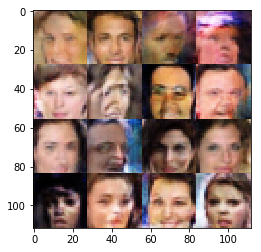

Epoch 1/1... Generator Loss: 0.4597 Discriminator Loss: 1.4133...
Epoch 1/1... Generator Loss: 0.6602 Discriminator Loss: 1.4476...
Epoch 1/1... Generator Loss: 0.7612 Discriminator Loss: 1.2771...
Epoch 1/1... Generator Loss: 0.7743 Discriminator Loss: 1.2418...
Epoch 1/1... Generator Loss: 0.6731 Discriminator Loss: 1.4002...
Epoch 1/1... Generator Loss: 0.5530 Discriminator Loss: 1.4865...
Epoch 1/1... Generator Loss: 0.5563 Discriminator Loss: 1.6436...
Epoch 1/1... Generator Loss: 0.7402 Discriminator Loss: 1.4164...
Epoch 1/1... Generator Loss: 0.6558 Discriminator Loss: 1.4398...
Epoch 1/1... Generator Loss: 0.7311 Discriminator Loss: 1.3132...


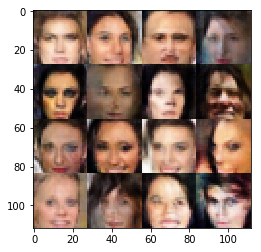

Epoch 1/1... Generator Loss: 0.8438 Discriminator Loss: 1.2164...
Epoch 1/1... Generator Loss: 0.4004 Discriminator Loss: 1.8596...
Epoch 1/1... Generator Loss: 0.5359 Discriminator Loss: 1.4735...
Epoch 1/1... Generator Loss: 0.6299 Discriminator Loss: 1.3269...
Epoch 1/1... Generator Loss: 0.6542 Discriminator Loss: 1.2696...
Epoch 1/1... Generator Loss: 0.7594 Discriminator Loss: 1.4229...
Epoch 1/1... Generator Loss: 0.6380 Discriminator Loss: 1.4099...
Epoch 1/1... Generator Loss: 0.8306 Discriminator Loss: 1.3386...
Epoch 1/1... Generator Loss: 0.7672 Discriminator Loss: 1.1990...
Epoch 1/1... Generator Loss: 0.6261 Discriminator Loss: 1.3381...


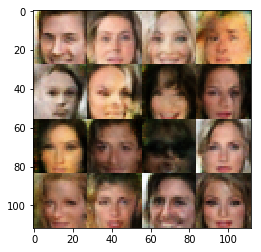

Epoch 1/1... Generator Loss: 0.5116 Discriminator Loss: 1.5595...
Epoch 1/1... Generator Loss: 0.5969 Discriminator Loss: 1.3834...
Epoch 1/1... Generator Loss: 0.7886 Discriminator Loss: 1.3384...
Epoch 1/1... Generator Loss: 0.7067 Discriminator Loss: 1.2158...
Epoch 1/1... Generator Loss: 0.4682 Discriminator Loss: 1.7895...
Epoch 1/1... Generator Loss: 1.1525 Discriminator Loss: 1.1141...
Epoch 1/1... Generator Loss: 0.8792 Discriminator Loss: 1.3472...
Epoch 1/1... Generator Loss: 0.8716 Discriminator Loss: 1.0802...
Epoch 1/1... Generator Loss: 0.9164 Discriminator Loss: 1.0595...
Epoch 1/1... Generator Loss: 0.6620 Discriminator Loss: 1.4039...


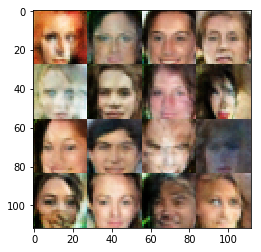

Epoch 1/1... Generator Loss: 0.4742 Discriminator Loss: 1.3528...
Epoch 1/1... Generator Loss: 0.5214 Discriminator Loss: 1.5094...
Epoch 1/1... Generator Loss: 0.9191 Discriminator Loss: 1.2717...
Epoch 1/1... Generator Loss: 0.5434 Discriminator Loss: 1.4454...
Epoch 1/1... Generator Loss: 0.5575 Discriminator Loss: 1.4570...
Epoch 1/1... Generator Loss: 0.5305 Discriminator Loss: 1.4916...
Epoch 1/1... Generator Loss: 0.4433 Discriminator Loss: 1.5440...
Epoch 1/1... Generator Loss: 0.8361 Discriminator Loss: 1.3157...
Epoch 1/1... Generator Loss: 0.8176 Discriminator Loss: 1.2313...
Epoch 1/1... Generator Loss: 0.8019 Discriminator Loss: 1.3290...


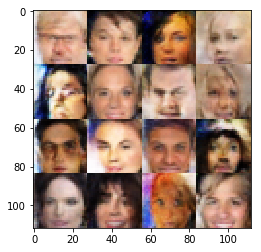

Epoch 1/1... Generator Loss: 0.6318 Discriminator Loss: 1.5716...
Epoch 1/1... Generator Loss: 0.7666 Discriminator Loss: 1.3600...
Epoch 1/1... Generator Loss: 0.5276 Discriminator Loss: 1.5349...
Epoch 1/1... Generator Loss: 0.6069 Discriminator Loss: 1.4866...
Epoch 1/1... Generator Loss: 0.5483 Discriminator Loss: 1.5153...
Epoch 1/1... Generator Loss: 0.7862 Discriminator Loss: 1.1651...
Epoch 1/1... Generator Loss: 0.9470 Discriminator Loss: 1.0513...
Epoch 1/1... Generator Loss: 0.7062 Discriminator Loss: 1.2406...
Epoch 1/1... Generator Loss: 0.7057 Discriminator Loss: 1.3048...
Epoch 1/1... Generator Loss: 0.4543 Discriminator Loss: 1.5166...


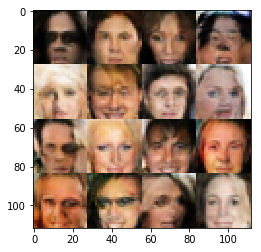

Epoch 1/1... Generator Loss: 0.5697 Discriminator Loss: 1.4878...
Epoch 1/1... Generator Loss: 0.4811 Discriminator Loss: 1.5861...
Epoch 1/1... Generator Loss: 0.4747 Discriminator Loss: 1.5264...
Epoch 1/1... Generator Loss: 0.3372 Discriminator Loss: 1.7756...
Epoch 1/1... Generator Loss: 0.7551 Discriminator Loss: 1.2641...
Epoch 1/1... Generator Loss: 0.6120 Discriminator Loss: 1.4901...
Epoch 1/1... Generator Loss: 0.4548 Discriminator Loss: 1.8443...
Epoch 1/1... Generator Loss: 0.6384 Discriminator Loss: 1.2692...
Epoch 1/1... Generator Loss: 0.9373 Discriminator Loss: 1.0398...
Epoch 1/1... Generator Loss: 0.5750 Discriminator Loss: 1.5971...


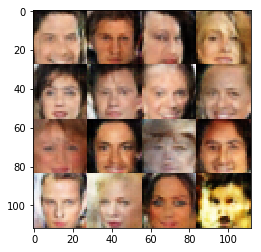

Epoch 1/1... Generator Loss: 0.4225 Discriminator Loss: 1.8514...
Epoch 1/1... Generator Loss: 0.9427 Discriminator Loss: 1.5108...
Epoch 1/1... Generator Loss: 0.5049 Discriminator Loss: 1.4688...
Epoch 1/1... Generator Loss: 0.4875 Discriminator Loss: 1.5232...
Epoch 1/1... Generator Loss: 0.5795 Discriminator Loss: 1.2631...
Epoch 1/1... Generator Loss: 0.5469 Discriminator Loss: 1.5218...
Epoch 1/1... Generator Loss: 0.5470 Discriminator Loss: 1.5316...
Epoch 1/1... Generator Loss: 0.6509 Discriminator Loss: 1.3383...
Epoch 1/1... Generator Loss: 0.7424 Discriminator Loss: 1.2550...
Epoch 1/1... Generator Loss: 0.9986 Discriminator Loss: 1.2629...


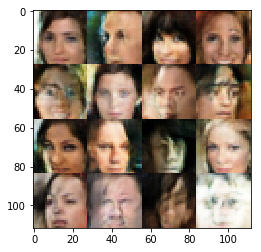

Epoch 1/1... Generator Loss: 0.7467 Discriminator Loss: 1.2412...
Epoch 1/1... Generator Loss: 0.4595 Discriminator Loss: 1.4826...
Epoch 1/1... Generator Loss: 0.6100 Discriminator Loss: 1.3647...
Epoch 1/1... Generator Loss: 0.5153 Discriminator Loss: 1.2823...
Epoch 1/1... Generator Loss: 0.4158 Discriminator Loss: 1.5098...
Epoch 1/1... Generator Loss: 0.6763 Discriminator Loss: 1.5144...
Epoch 1/1... Generator Loss: 0.5679 Discriminator Loss: 1.3464...
Epoch 1/1... Generator Loss: 0.5038 Discriminator Loss: 1.5760...
Epoch 1/1... Generator Loss: 0.5320 Discriminator Loss: 1.5029...
Epoch 1/1... Generator Loss: 0.7611 Discriminator Loss: 1.4071...


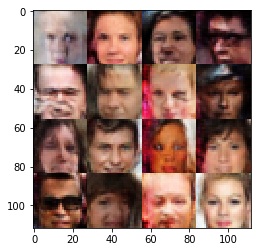

Epoch 1/1... Generator Loss: 0.7792 Discriminator Loss: 1.2241...
Epoch 1/1... Generator Loss: 0.7372 Discriminator Loss: 1.3252...
Epoch 1/1... Generator Loss: 0.4882 Discriminator Loss: 1.6118...
Epoch 1/1... Generator Loss: 0.5515 Discriminator Loss: 1.3882...
Epoch 1/1... Generator Loss: 0.5499 Discriminator Loss: 1.3856...
Epoch 1/1... Generator Loss: 0.7889 Discriminator Loss: 1.4241...
Epoch 1/1... Generator Loss: 0.6119 Discriminator Loss: 1.3464...
Epoch 1/1... Generator Loss: 0.7582 Discriminator Loss: 1.2605...
Epoch 1/1... Generator Loss: 0.3422 Discriminator Loss: 1.8410...
Epoch 1/1... Generator Loss: 0.7334 Discriminator Loss: 1.2642...


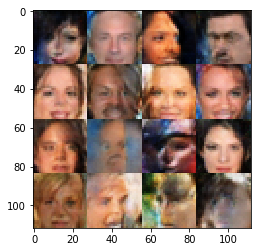

Epoch 1/1... Generator Loss: 0.8367 Discriminator Loss: 1.1610...
Epoch 1/1... Generator Loss: 0.5783 Discriminator Loss: 1.3602...
Epoch 1/1... Generator Loss: 0.4420 Discriminator Loss: 1.4886...
Epoch 1/1... Generator Loss: 0.6004 Discriminator Loss: 1.4697...
Epoch 1/1... Generator Loss: 0.3343 Discriminator Loss: 1.9494...
Epoch 1/1... Generator Loss: 0.4473 Discriminator Loss: 1.4130...
Epoch 1/1... Generator Loss: 0.6068 Discriminator Loss: 1.5415...
Epoch 1/1... Generator Loss: 0.7010 Discriminator Loss: 1.3619...
Epoch 1/1... Generator Loss: 0.7025 Discriminator Loss: 1.3453...
Epoch 1/1... Generator Loss: 0.4166 Discriminator Loss: 1.7177...


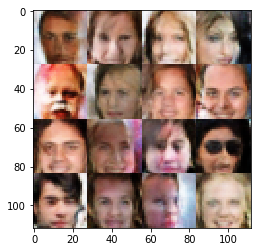

Epoch 1/1... Generator Loss: 0.7517 Discriminator Loss: 1.3465...
Epoch 1/1... Generator Loss: 0.7297 Discriminator Loss: 1.3585...
Epoch 1/1... Generator Loss: 0.7331 Discriminator Loss: 1.1810...
Epoch 1/1... Generator Loss: 0.9215 Discriminator Loss: 1.1478...
Epoch 1/1... Generator Loss: 0.3839 Discriminator Loss: 1.7083...
Epoch 1/1... Generator Loss: 0.7452 Discriminator Loss: 1.3746...
Epoch 1/1... Generator Loss: 0.3609 Discriminator Loss: 1.9009...
Epoch 1/1... Generator Loss: 0.5959 Discriminator Loss: 1.5053...
Epoch 1/1... Generator Loss: 0.3981 Discriminator Loss: 1.6664...
Epoch 1/1... Generator Loss: 0.4841 Discriminator Loss: 1.3793...


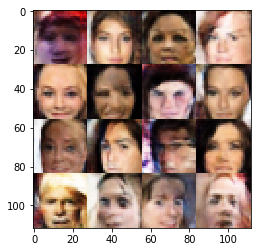

Epoch 1/1... Generator Loss: 0.6719 Discriminator Loss: 1.2101...
Epoch 1/1... Generator Loss: 0.6245 Discriminator Loss: 1.3852...
Epoch 1/1... Generator Loss: 0.4737 Discriminator Loss: 1.4512...
Epoch 1/1... Generator Loss: 0.6675 Discriminator Loss: 1.5014...
Epoch 1/1... Generator Loss: 0.3680 Discriminator Loss: 2.0051...
Epoch 1/1... Generator Loss: 0.4611 Discriminator Loss: 1.5577...
Epoch 1/1... Generator Loss: 0.7272 Discriminator Loss: 1.2259...
Epoch 1/1... Generator Loss: 0.4481 Discriminator Loss: 1.4412...
Epoch 1/1... Generator Loss: 0.4774 Discriminator Loss: 1.5160...
Epoch 1/1... Generator Loss: 0.4974 Discriminator Loss: 1.4751...


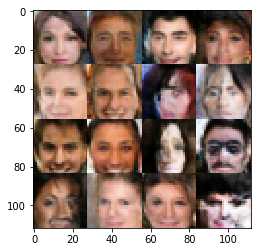

Epoch 1/1... Generator Loss: 0.6159 Discriminator Loss: 1.4674...
Epoch 1/1... Generator Loss: 0.7008 Discriminator Loss: 1.4225...
Epoch 1/1... Generator Loss: 0.6256 Discriminator Loss: 1.4564...


In [44]:
batch_size = 32
z_dim = 200
learning_rate = 0.0002
beta1 = 0.3

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.